## Bitcoin Price Exploratory Data Analysis

<span style="color: lightblue;">**Data Dictionary**</span>

- **Timestamp**: Start time of time window (60s window), in Unix time
- **Open**: Open price at start time window
- **High**: High price at start time window
- **Low**: Low price at start time window
- **Close**: Close price at start time window
- **Volume**: Volume of BTC transacted in this window

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

DATA_PATH = "../data/"

In [2]:
# checks for null (NaN) values in each column of the dataframe.
def check_for_null_values(df: pd.DataFrame):
    null_values = df.isnull().sum()
    columns_with_null = null_values[null_values > 0]
    print("Columns with null values:")
    print(columns_with_null)

# define a conversion function for the native timestamps in the csv file
def dateparse(unix_timestamp: float):
    return datetime.datetime.fromtimestamp(unix_timestamp) if not np.isnan(unix_timestamp) else np.nan

# get duplicated values in the column of the dataframe
def get_duplicated_values_on_column(df: pd.DataFrame, col: str):
    df_counts = df[col].value_counts()
    duplicated = list(df_counts[df_counts > 1].index)
    return duplicated

In [3]:
df = pd.read_csv(DATA_PATH + "btcusd_1-min_data.csv") # read the csv data
df['Timestamp'] = df['Timestamp'].apply(dateparse) # apply convertion from unix timestamp to datetime

df.head(3)

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 07:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 07:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 07:03:00,4.58,4.58,4.58,4.58,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698281 entries, 0 to 6698280
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 306.6 MB


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,6698280,2018-05-15 08:42:20.628285952,2012-01-01 07:01:00,2015-03-09 07:30:45,2018-05-15 08:00:30,2021-07-21 08:30:15,2024-10-14 21:00:00,NaN
Open,6698281.0,14134.608139,3.8,410.3,6177.45,22771.0,73793.0,18925.032191
High,6698281.0,14140.761959,3.8,410.5,6180.5,22780.0,73794.0,18932.460004
Low,6698281.0,14128.26724,3.8,410.11,6173.57,22761.77,73739.0,18917.475008
Close,6698281.0,14134.634412,3.8,410.3,6177.38,22770.88,73794.0,18925.119551
Volume,6698281.0,5.484758,0.0,0.0181,0.5,3.195695,5853.852166,23.001751


<span style="color: lightblue; font-size: 14px;">Comments:</span>

- Transactions from 2012 to 2024, total of ~7 milions
- Min price $3.8, Max price $73794
- Min volume 0, Max volume 5853

In [6]:
check_for_null_values(df)

Columns with null values:
Timestamp    1
dtype: int64


<span style="color: lightblue; font-size: 14px;">Comments:</span>

- Only 1 null value in the timestamp column

### Exploratory Data Analysis

In [7]:
# check if there is duplicated values in the timestamp column
get_duplicated_values_on_column(df, 'Timestamp')

[]

let's see which value is NaN in the timestamp

In [8]:
df[df.Timestamp.isna()]

,Timestamp,Open,High,Low,Close,Volume
6698280,NaT,57854.0,57864.0,57835.0,57835.0,1.353466


maybe can this can be fixed, let's see the previous and the next transactions

In [9]:
nan_index = 6698280
indexes = [nan_index - 1, nan_index] # nan_index + 1: throwed an out-of-bounds error.
df.iloc[indexes]

,Timestamp,Open,High,Low,Close,Volume
6698279,2024-10-14 21:00:00,66070.0,66118.0,66070.0,66098.0,0.483483
6698280,NaT,57854.0,57864.0,57835.0,57835.0,1.353466


<span style="color: lightblue; font-size: 14px;">Comments:</span>

- Trying to iloc the previous and the next transaction throwed an error of out-of-bounds, meaning that the position of the NaN timestamp is the last one, so we can remove it from the df.

In [10]:
df.dropna(inplace=True) # drop the nan values

Bitcoin price over time

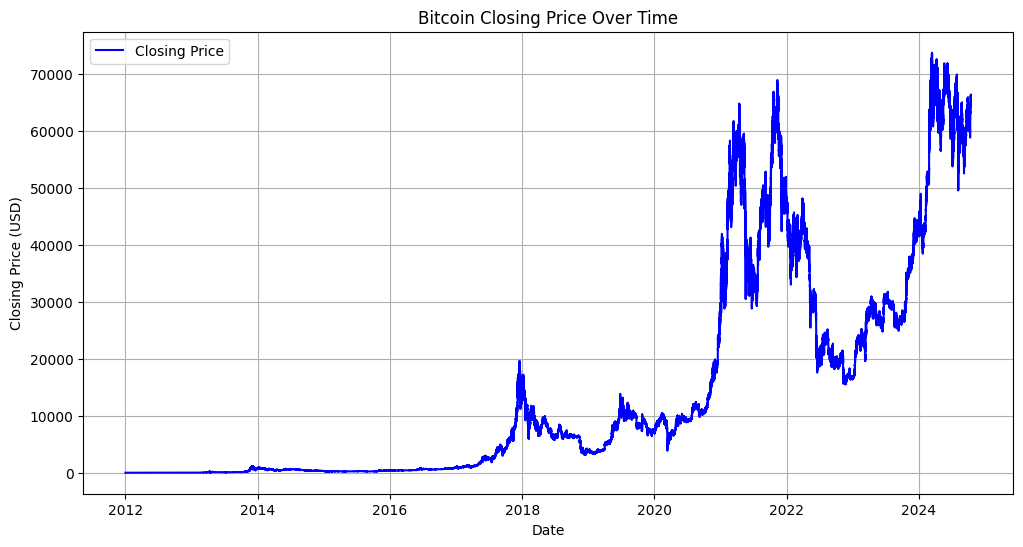

In [11]:
# Plotting the Closing Price over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Close'], label='Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- The price of the bitcoin kept still from 2012 to 2017 when it started to raise significantly for the first time in 2018.
- Peaks and valleys until reaches the highests prices in 2021 and 2024.

Distribution of the closing prices

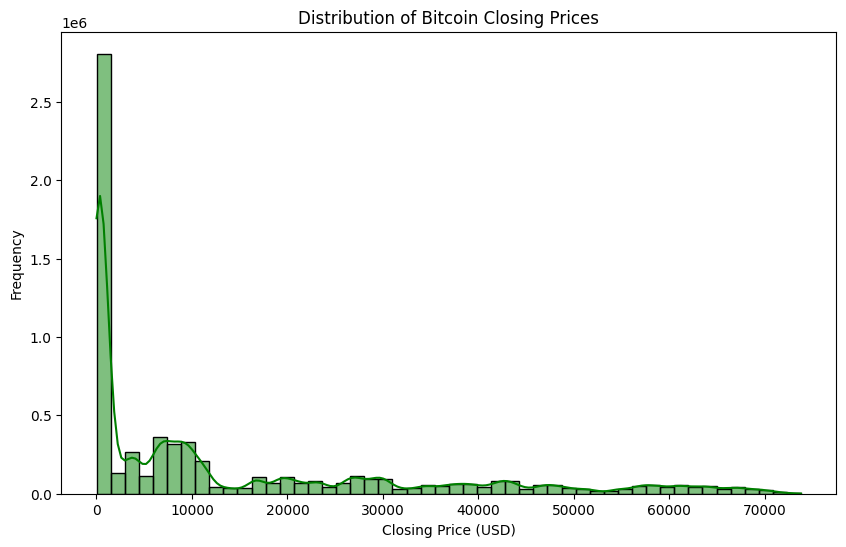

In [12]:
# Distribution of the closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='green')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- The distribution of the closing price is positive skewed
- If you discard the first years (2012 - 2017) where the price stayed stable between 0 and < 10000, the rest of the distribution is almost even

Correlations between variables

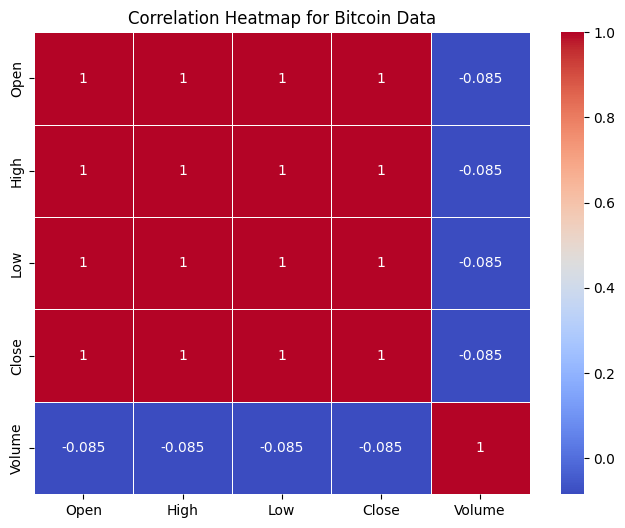

In [13]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Bitcoin Data')
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- As expected the correlation between the Open, Close, Low and High values are extremely strong in the positive side, meaning that if my open value is higher, for example, the other values will be higher as well.
- Note that the volume is slightly negative correlated with the other variables, meaning that if the price is high, the tendence of transactioning is a little bit lower. It also make sense, because people tend to  buy bitcoins when its not in the highest values, and people selling may believe that the price will still go up.

let's go deeper into that

Volume X Price

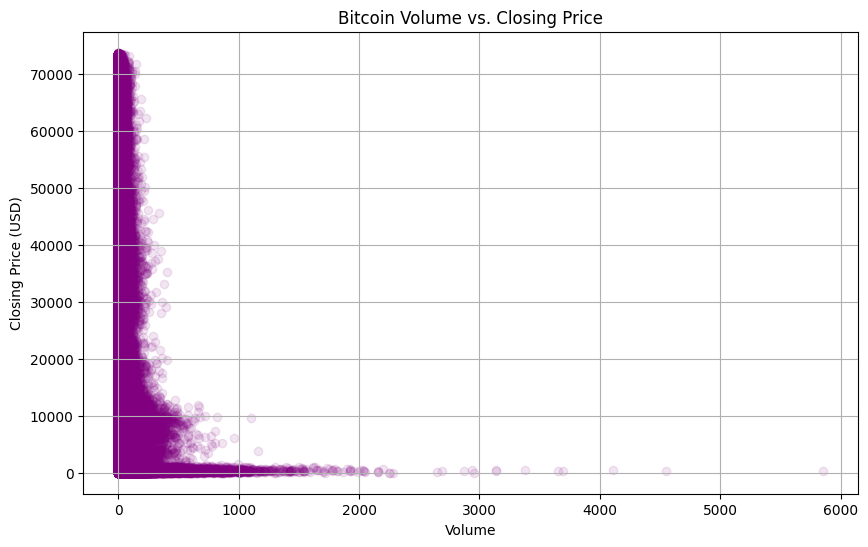

In [14]:
# Volume X closing price
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.1, color='purple')
plt.title('Bitcoin Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- Even with a lower value of alpha, there is still a lot of volume all long the Y axis.
- But we can see that the highest values of transactions where when the bitcoin was with the lowest historical price, besides it's still being transaction even with the higher prices.

Weekday analysis of the price

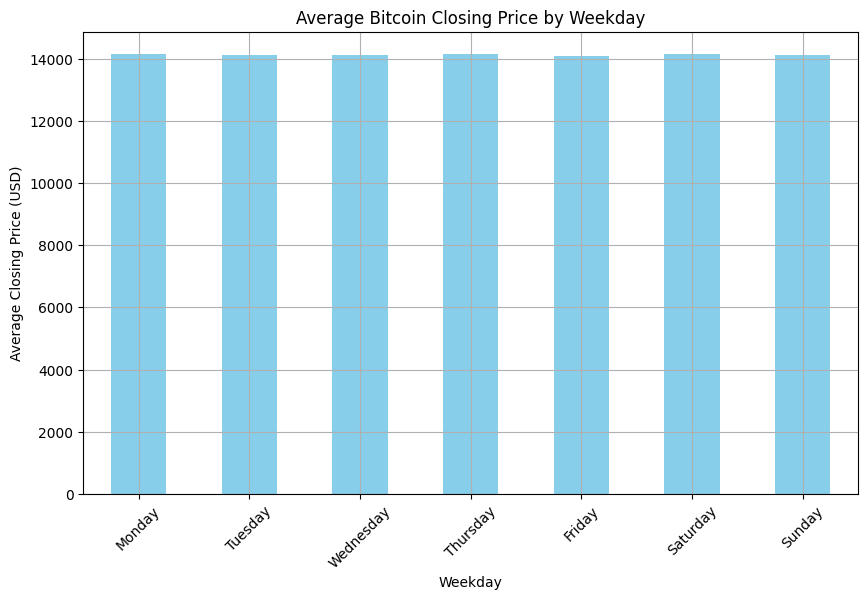

In [15]:
_ = df.copy()
_['Weekday'] = _['Timestamp'].dt.day_name() # Extract the weekday from the timestamp (0=Monday, 6=Sunday)

weekly_analysis = _.groupby('Weekday')['Close'].mean() # group by weekday
weekday_analysis = weekly_analysis.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_diff = weekday_analysis.diff().fillna(0)  # Fill NaN for the first value with 0 (or another value if needed)

# Plot the weekday analysis
plt.figure(figsize=(10, 6))
weekday_analysis.plot(kind='bar', color='skyblue')
plt.title('Average Bitcoin Closing Price by Weekday')
plt.ylabel('Average Closing Price (USD)')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

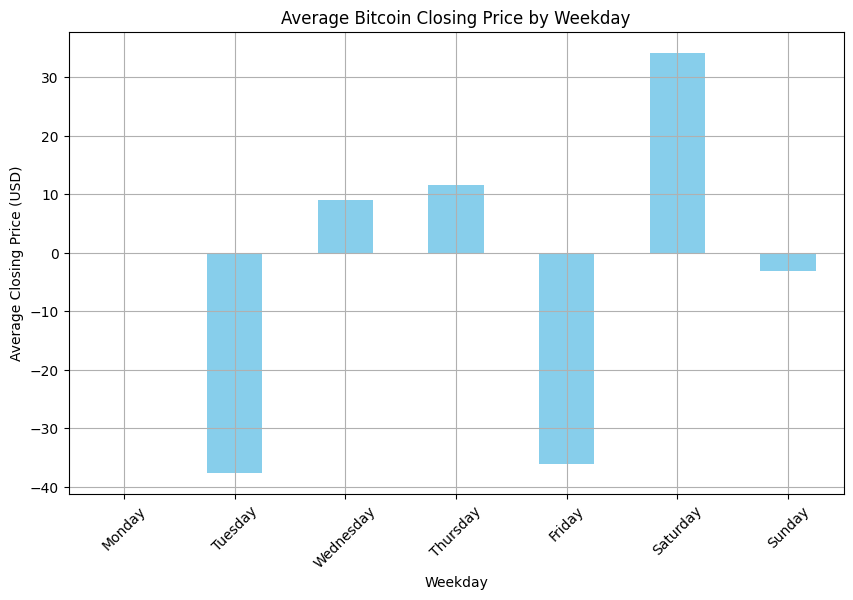

In [16]:
# Plot the weekday diff
plt.figure(figsize=(10, 6))
weekday_diff.plot(kind='bar', color='skyblue')
plt.title('Average Bitcoin Closing Price by Weekday')
plt.ylabel('Average Closing Price (USD)')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- There is no significant difference between the mean values of the weekdays

Hourly analysis of the price

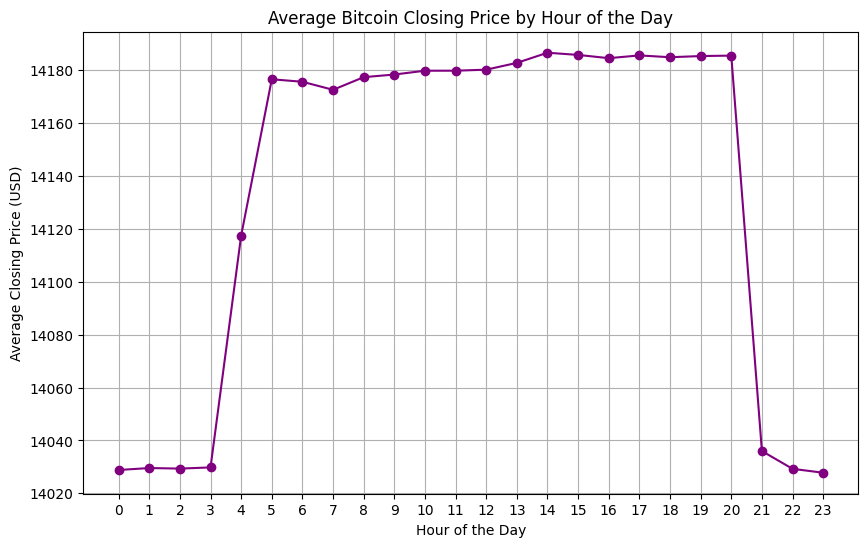

In [17]:
df['Hour'] = df['Timestamp'].dt.hour # get hour of the transaction
hourly_mean = df.groupby('Hour').mean()['Close']  # Group by hour and calculate the mean closing price

# Plot the mean closing price by hour
plt.figure(figsize=(10, 6))
hourly_mean.plot(kind='line', marker='o', color='purple')
plt.title('Average Bitcoin Closing Price by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- There is a change in the price between the "daytime" of the UTC dataset. But seeing the value of the price, that doesn't represent a significant change.

Let's see the volume of the transactions now

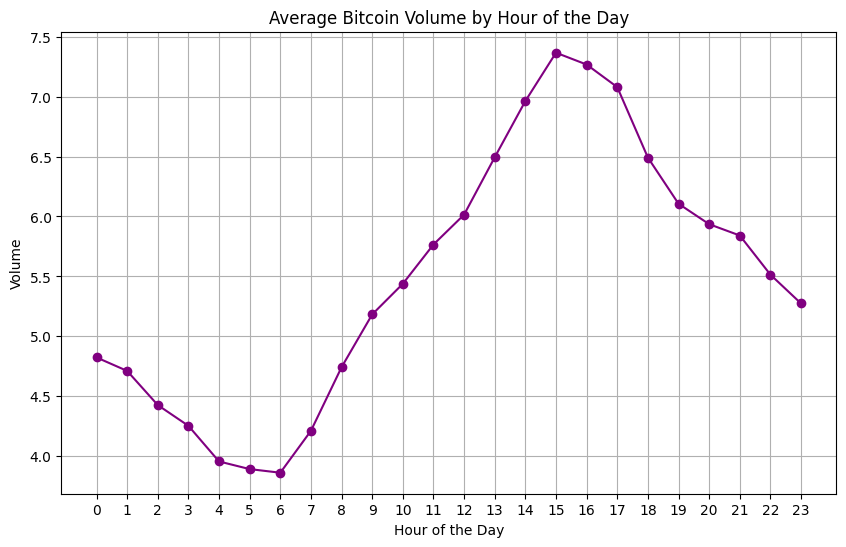

In [18]:
hourly_mean = df.groupby('Hour').mean()['Volume']  # Group by hour and calculate the mean volume

# Plot the mean closing price by hour
plt.figure(figsize=(10, 6))
hourly_mean.plot(kind='line', marker='o', color='purple')
plt.title('Average Bitcoin Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- The mean volume of transactions is facing another cenario here. There is a trend of movement in the UTC noon, that goes up until 3PM than it starts to fall until 5AM, when it's coming up again.

Diff between open and close values

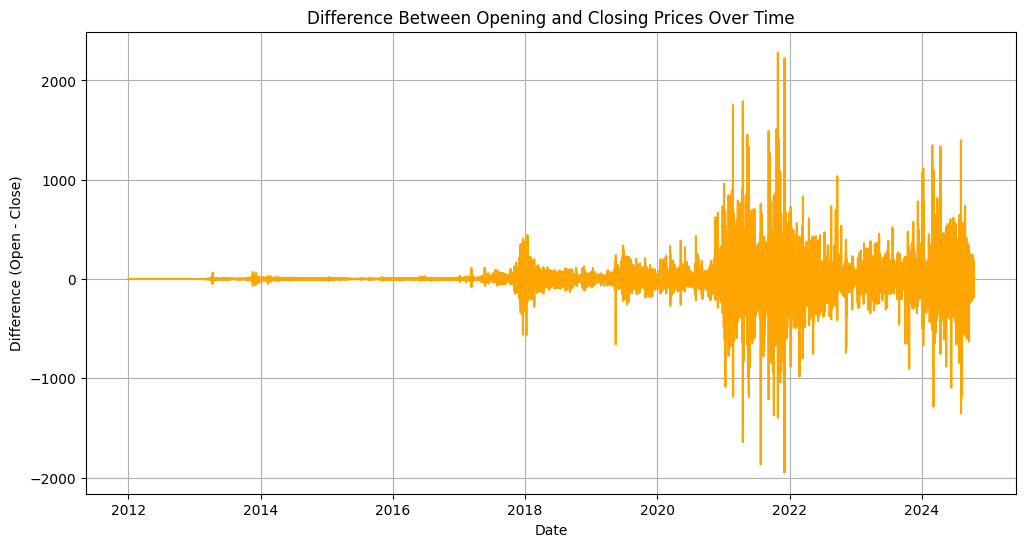

In [19]:
# Calculate the difference between Open and Close prices
df['Open_Close_Diff'] = df['Open'] - df['Close']

# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Open_Close_Diff'], color='orange')
plt.title('Difference Between Opening and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Difference (Open - Close)')
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- High difference in the Open and Close values between 2021 and 2022, showing a more volatility

Diff between High and Low values

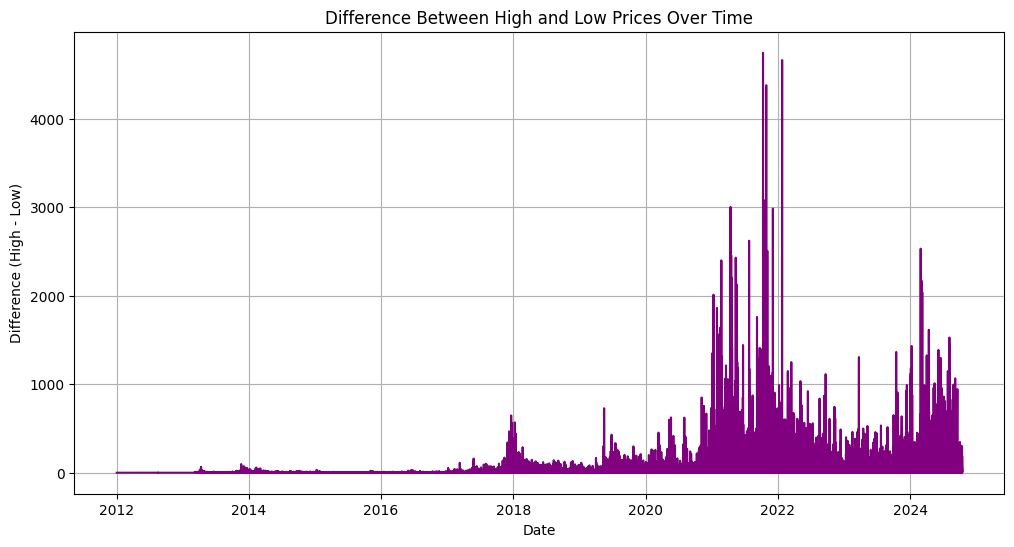

In [20]:
# Calculate the difference between High and Low prices
df['High_Low_Diff'] = df['High'] - df['Low']

# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['High_Low_Diff'], color='purple')
plt.title('Difference Between High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Difference (High - Low)')
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- A high difference in the High and Low values, confirming that volatility between 21-22

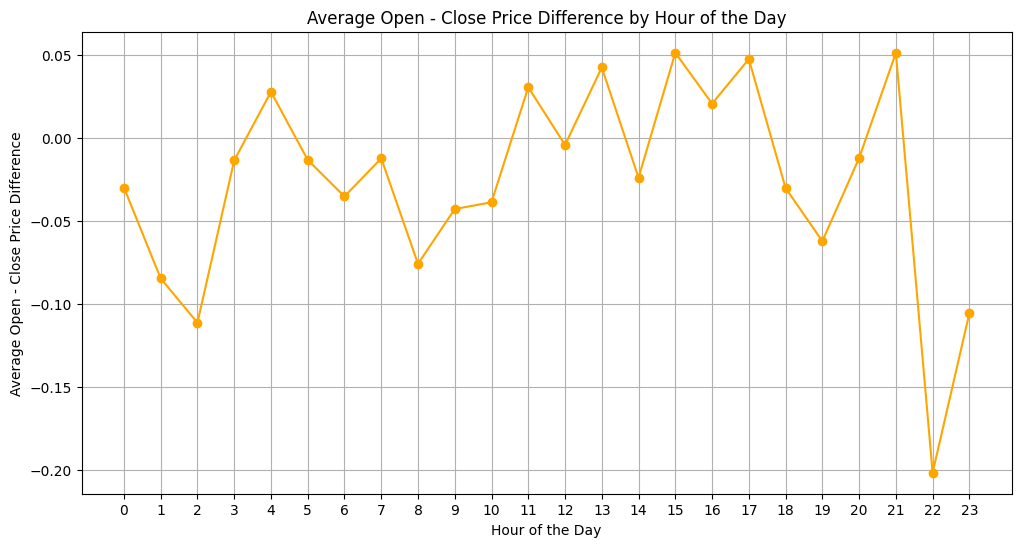

In [21]:
# Step 1: Calculate the mean difference between Open and Close prices by hour
hourly_open_close_diff = df.groupby('Hour')['Open_Close_Diff'].mean()

# Step 2: Plot the mean difference as a line graph
plt.figure(figsize=(12, 6))
plt.plot(hourly_open_close_diff.index, hourly_open_close_diff.values, marker='o', color='orange', linestyle='-')
plt.title('Average Open - Close Price Difference by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Open - Close Price Difference')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- Making the analysis by hour, we can see that historically, it's more instable at the dawn

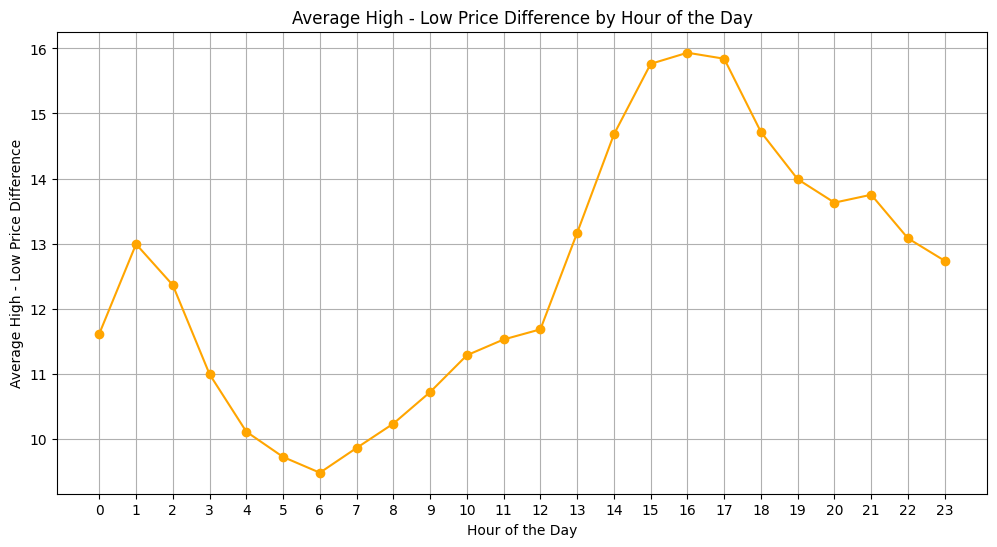

In [22]:
# Step 1: Calculate the mean difference between Open and Close prices by hour
hourly_open_close_diff = df.groupby('Hour')['High_Low_Diff'].mean()

# Step 2: Plot the mean difference as a line graph
plt.figure(figsize=(12, 6))
plt.plot(hourly_open_close_diff.index, hourly_open_close_diff.values, marker='o', color='orange', linestyle='-')
plt.title('Average High - Low Price Difference by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average High - Low Price Difference')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- The defference trend of the High - Low follows a lot the line of the volume transactioned per hour, that makes a lot of sense.

Looking for the whole dataset may not be the best way to understand how the bitcoin value is behaving today, because there is a lot of years, that doesn't represent the actual scenario anymore. Let's start taking a closer look to the recent behavior as well, to see if there are more insights.

### Last Year EDA

In [23]:
# filter dataframe from 1 year from the last date
last_date = df['Timestamp'].max() # get the last date
one_year_ago = last_date - pd.DateOffset(years=1) # reduce 1 year from the last date
one_year_df = df[df['Timestamp'] >= one_year_ago].copy() # filter dataframe from 1 year from the last date

one_year_df.head(3)

,Timestamp,Open,High,Low,Close,Volume,Hour,Open_Close_Diff,High_Low_Diff
6197939,2023-10-14 21:00:00,26862.0,26862.0,26862.0,26862.0,0.036860,21,0.0,0.0
6197940,2023-10-14 21:01:00,26862.0,26865.0,26859.0,26865.0,0.061749,21,-3.0,6.0
6197941,2023-10-14 21:02:00,26865.0,26865.0,26865.0,26865.0,0.000000,21,0.0,0.0


Now, filtering the last year, we can see more detailed how the bitcoin is behaving now

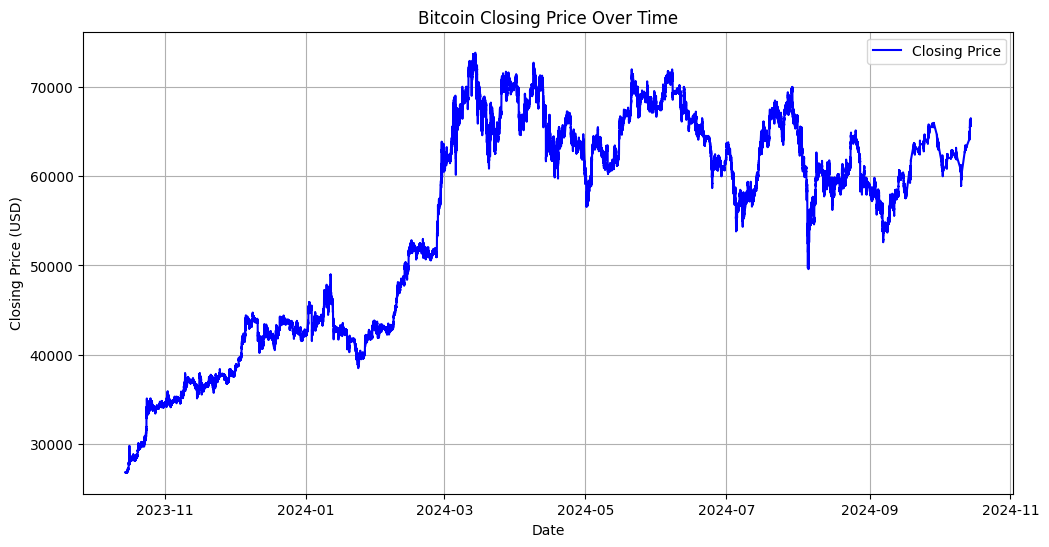

In [24]:
# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(one_year_df['Timestamp'], one_year_df['Close'], label='Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- We can see how the price is rising in the last year, that was smashed due the long-term analysis

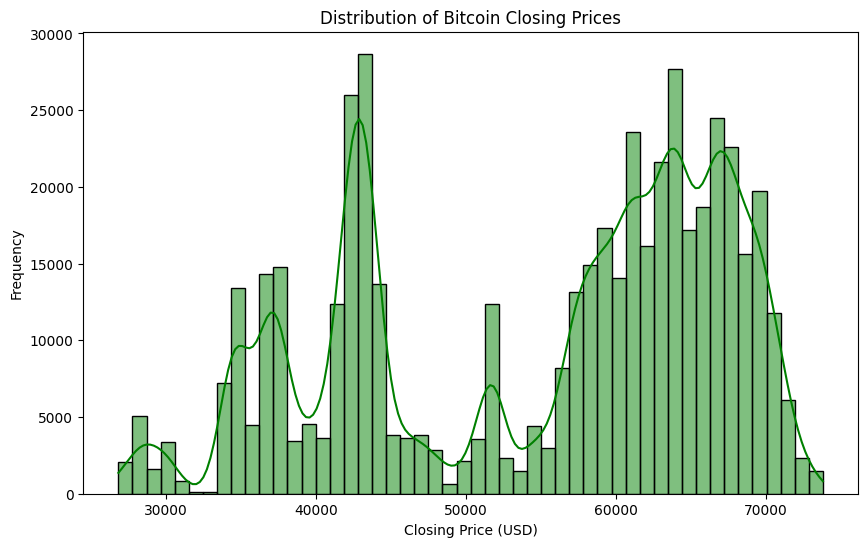

In [25]:
# Distribution of the closing prices
plt.figure(figsize=(10, 6))
sns.histplot(one_year_df['Close'], bins=50, kde=True, color='green')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- The distribution of values now is an kind of bimodal, where we can see that it's concentrated more over $550,000 - $700,000

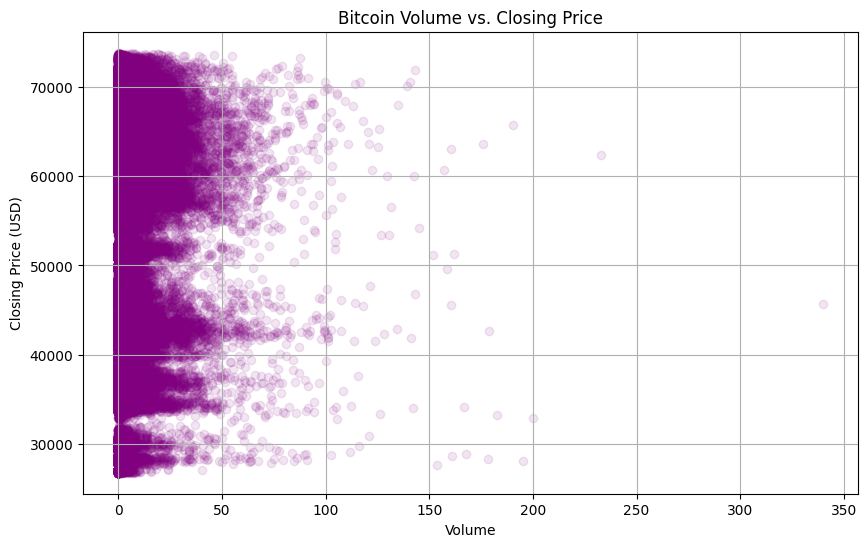

In [26]:
# Volume X closing price
plt.figure(figsize=(10, 6))
plt.scatter(one_year_df['Volume'], one_year_df['Close'], alpha=0.1, color='purple')
plt.title('Bitcoin Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

<span style="color: lightblue; font-size: 14px;">Comments:</span>

- We can see now that bitcoin is being transactioned with higher prices

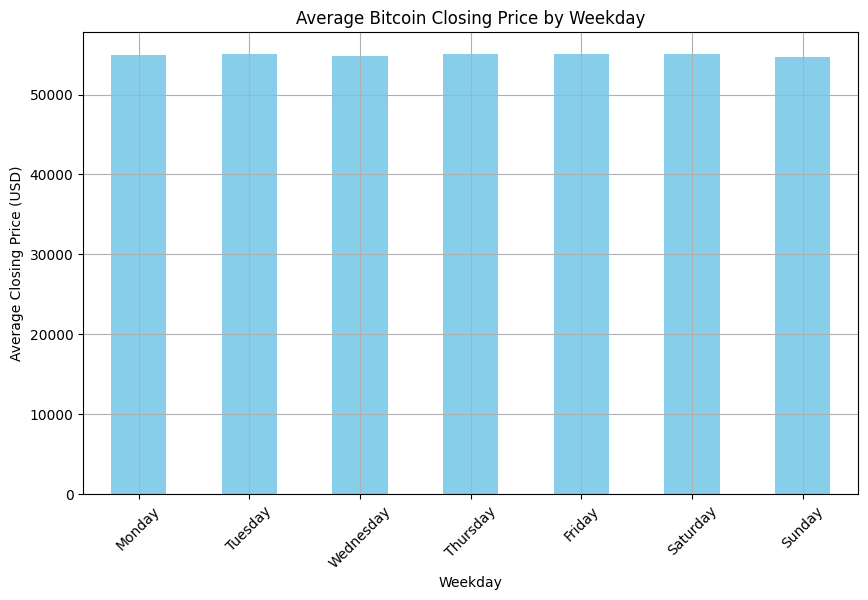

In [27]:
_ = one_year_df.copy()
_['Weekday'] = _['Timestamp'].dt.day_name() # Extract the weekday from the timestamp (0=Monday, 6=Sunday)

weekly_analysis = _.groupby('Weekday')['Close'].mean() # group by weekday
weekday_analysis = weekly_analysis.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_diff = weekday_analysis.diff().fillna(0)  # Fill NaN for the first value with 0 (or another value if needed)

# Plot the weekday analysis
plt.figure(figsize=(10, 6))
weekday_analysis.plot(kind='bar', color='skyblue')
plt.title('Average Bitcoin Closing Price by Weekday')
plt.ylabel('Average Closing Price (USD)')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

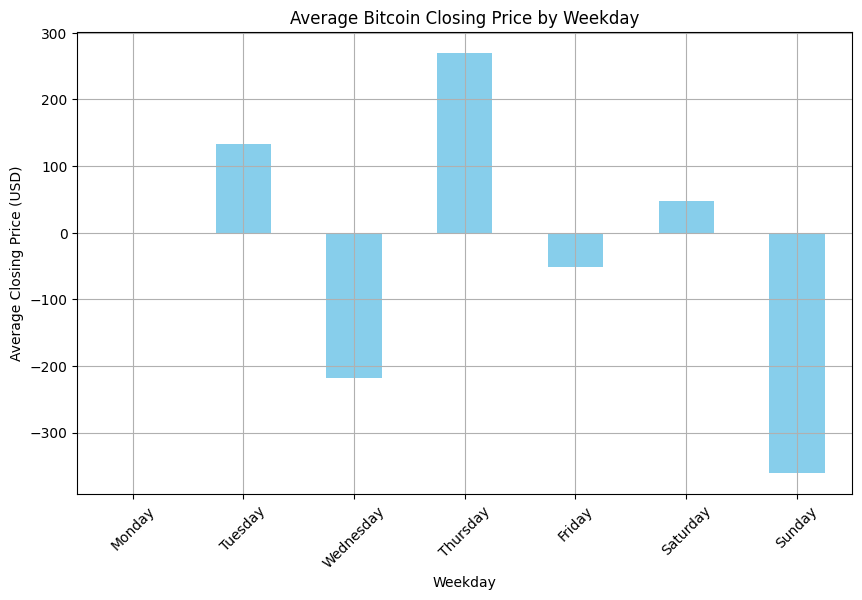

In [28]:
# Plot the weekday diff
plt.figure(figsize=(10, 6))
weekday_diff.plot(kind='bar', color='skyblue')
plt.title('Average Bitcoin Closing Price by Weekday')
plt.ylabel('Average Closing Price (USD)')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

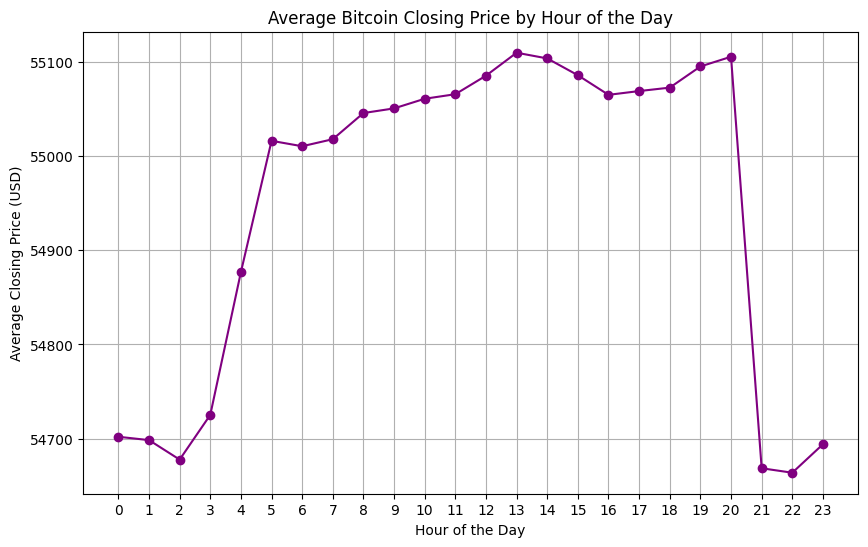

In [29]:
one_year_df['Hour'] = one_year_df['Timestamp'].dt.hour # get hour of the transaction
hourly_mean = one_year_df.groupby('Hour').mean()['Close']  # Group by hour and calculate the mean closing price

# Plot the mean closing price by hour
plt.figure(figsize=(10, 6))
hourly_mean.plot(kind='line', marker='o', color='purple')
plt.title('Average Bitcoin Closing Price by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

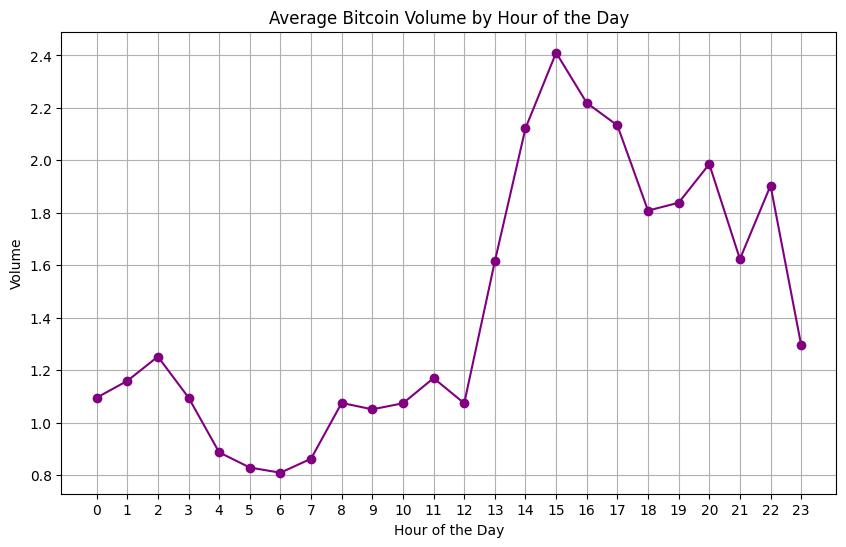

In [30]:
hourly_mean = one_year_df.groupby('Hour').mean()['Volume']  # Group by hour and calculate the mean volume

# Plot the mean closing price by hour
plt.figure(figsize=(10, 6))
hourly_mean.plot(kind='line', marker='o', color='purple')
plt.title('Average Bitcoin Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume')
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

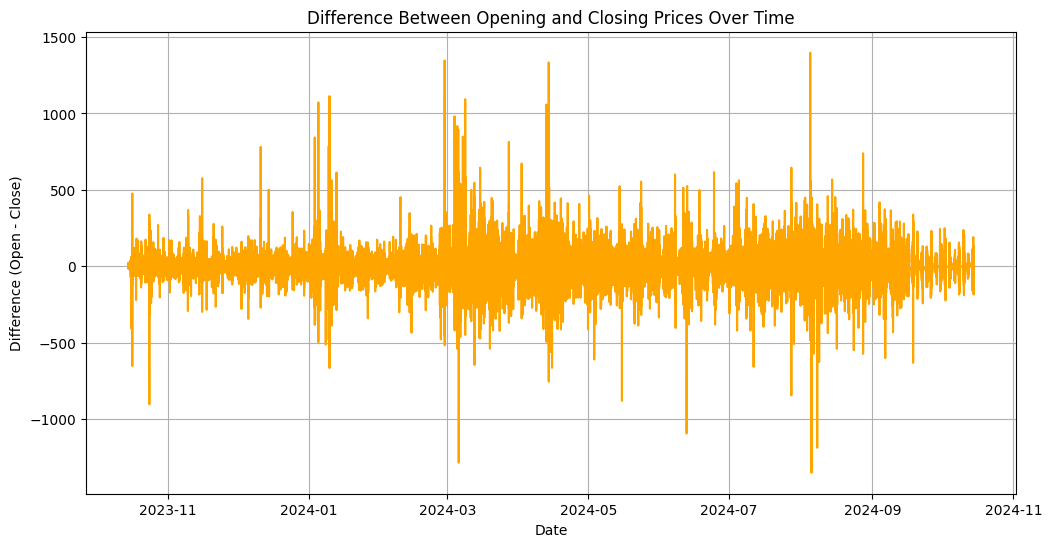

In [32]:
# Calculate the difference between Open and Close prices
one_year_df['Open_Close_Diff'] = one_year_df['Open'] - one_year_df['Close']

# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(one_year_df['Timestamp'], one_year_df['Open_Close_Diff'], color='orange')
plt.title('Difference Between Opening and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Difference (Open - Close)')
plt.grid(True)
plt.show()

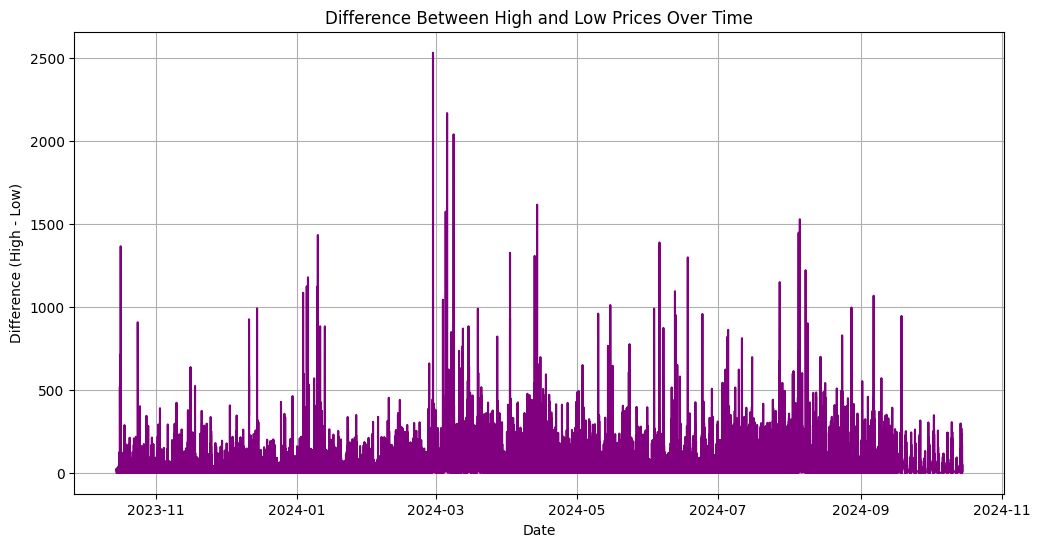

In [34]:
# Calculate the difference between High and Low prices
one_year_df['High_Low_Diff'] = one_year_df['High'] - one_year_df['Low']

# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(one_year_df['Timestamp'], one_year_df['High_Low_Diff'], color='purple')
plt.title('Difference Between High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Difference (High - Low)')
plt.grid(True)
plt.show()

The behavior in the short-term analysis is much different from the long-term, we can see that way it's behaving the last year have different trends on prices, hours, weekdays, volume, the only things that stayed the same were the correlations.

It might be a good strategy to fit a model with different terms of historical data, to see which one behaves best.